In [28]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plot_utils import adjust_spines

### Load loadings

In [3]:
datasets = []
for root, dirs, files in os.walk('./save_loadings'):
    for file in files:
        if file.endswith('C'):
            datasets.append(root + '/' + file)

In [4]:
dataset_names=[]
for dataset in datasets:
    dataset_names.append(dataset.split('/')[2][:-2])

In [8]:
loadings = []
for dataset in datasets:
    with open(dataset, 'rb') as f:
        loadings.append(
            pickle.load(f)['C']
        )

In [36]:
len(dataset_names)

20

In [34]:
len(loadings)

20

### Visualize loading structure 

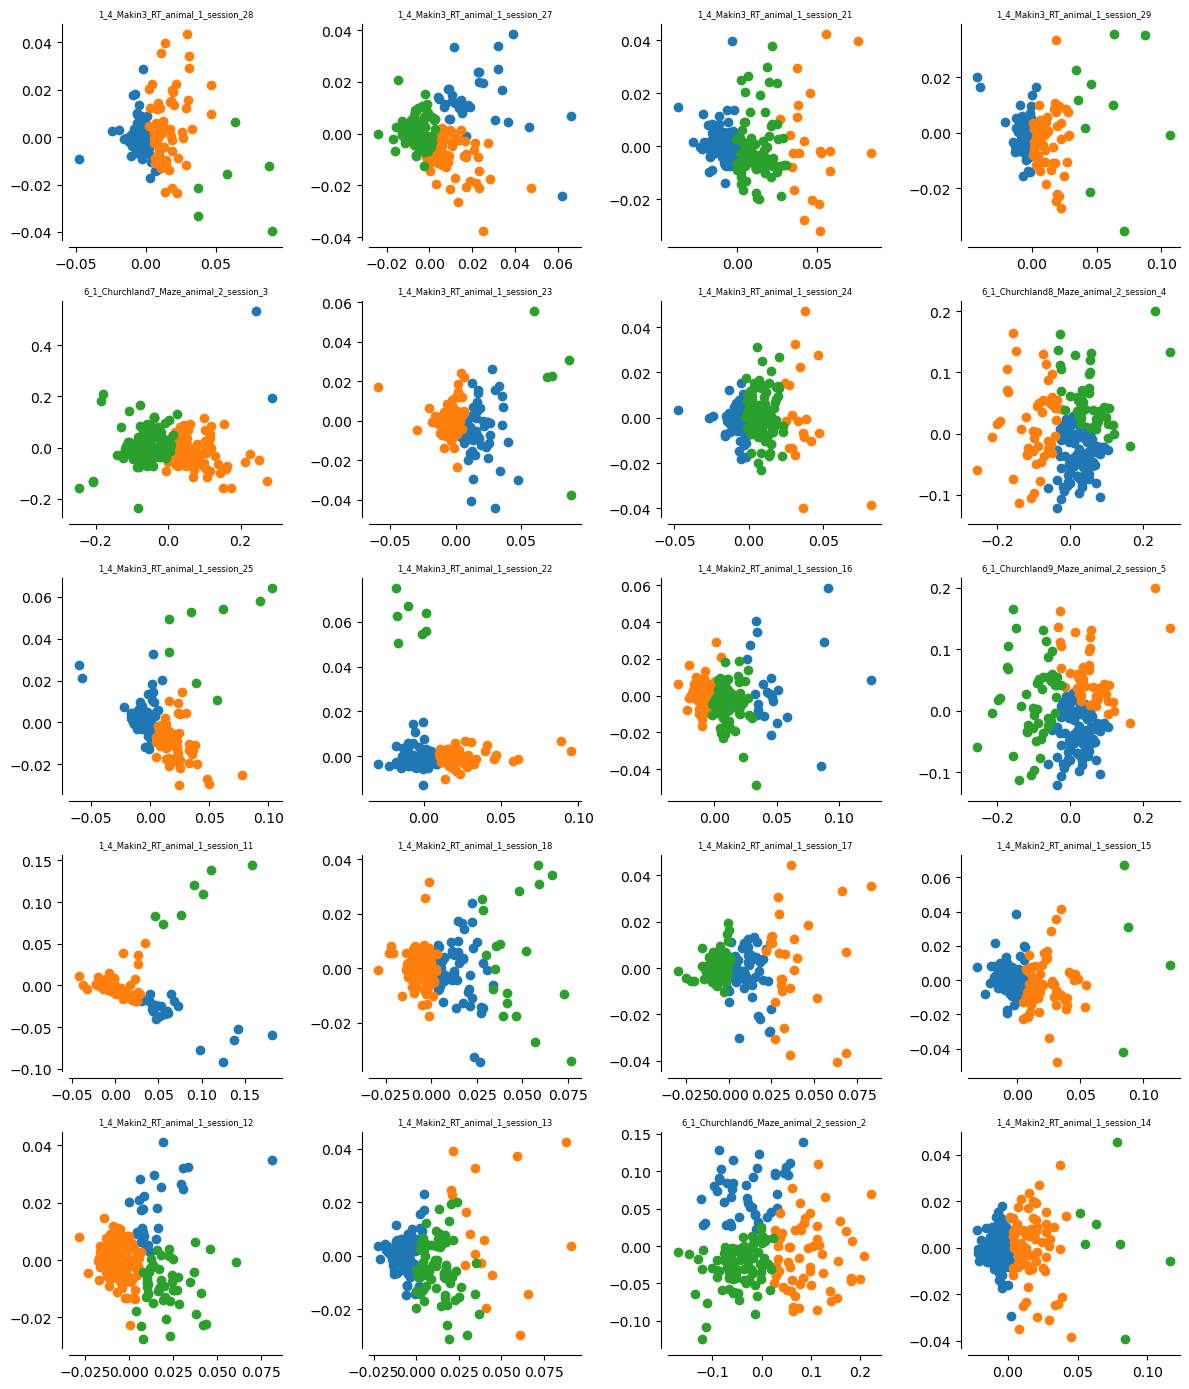

In [43]:
fig, axes = plt.subplots(5,4,figsize=(12, 14))
axes = axes.flatten()
for i, C in enumerate(loadings):
    
    ### k-means
    kmeans = KMeans(
        n_clusters=3, random_state=17, n_init=1000
    ).fit(C)
    clusters = kmeans.labels_
    
    
    ### PCA
    pca = PCA(n_components=2)
    z=pca.fit_transform(C)
    
    for c in np.unique(clusters):
        axes[i].scatter(z[clusters==c,0], z[clusters==c,1])
    axes[i].set_title(dataset_names[i][:-13], fontsize=6)
    sns.despine(ax=axes[i])
    adjust_spines(axes[i], ['left', 'bottom'])

plt.tight_layout()